# Summary
This project aims to analyze Amazon consumer behavior using a comprehensive dataset of 602 individuals. I will focus on five hypotheses that address key issues such as potential complaining buyers, levels of dissatisfaction, and their relationship with product categories, gender, and other factors.




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats 


# 1) Basic cuestions and issues about the Amazon data set

The dataset contains information about consumer behavior on the Amazon e-commerce platform.
It highlights several interesting aspects, such as the effectiveness of product recommendations, product groups, browser usage, add-to-cart frequency, and more.
My goal is to examine five key hypotheses, summarized in the following questions:

**1)** What gender have the greatest overall satisfaction with Amazon web servicies?

**2)** What is the purchase frequency of the dissatisfied Amazon shoppers?

**3)** What are the categories that show the highest leves of dissatisfaction?

**4)** What does the data tell us about the potential "complaining buyers"?

**5)** What is the browsing frequency of dissatisfied Amazon shoppers?`


# 1) Basic cuestions and issues about the Amazon data set

The dataset contains information about consumer behavior on the Amazon e-commerce platform.
It highlights several interesting aspects, such as the effectiveness of product recommendations, product groups, browser usage, add-to-cart frequency, and more.
My goal is to examine five key hypotheses, summarized in the following questions:

**1)** What gender have the greatest overall satisfaction with Amazon web servicies?

**2)** What is the purchase frequency of the dissatisfied Amazon shoppers?

**3)** What are the categories that show the highest leves of dissatisfaction?

**4)** What does the data tell us about the potential "complaining buyers"?

**5)** What is the browsing frequency of dissatisfied Amazon shoppers?`


# 2) Exploratory Data Analysis (EDA)



# 2.1) Univariate Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Reemplaza 'nombre-del-archivo.csv' con el nombre real del archivo dentro de la carpeta
df_ama = pd.read_csv('/kaggle/input/amazon-consumer-behaviour-dataset/Amazon Customer Behavior Survey.csv')

df_ama.head()



,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [4]:
df_ama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

As you can see, the dataset contains many categorical variables. For this reason, I will begin by analyzing the categorical variables first. My goal is to identify the categories for each variable and their respective frequencies.

# 2.1) a) Categorical variables analysis

In [5]:
df_ama_categoricals = df_ama.select_dtypes(include=['object'])
df_ama_categoricals.info()
df_ama_categoricals.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Timestamp                              602 non-null    object
 1   Gender                                 602 non-null    object
 2   Purchase_Frequency                     602 non-null    object
 3   Purchase_Categories                    602 non-null    object
 4   Personalized_Recommendation_Frequency  602 non-null    object
 5   Browsing_Frequency                     602 non-null    object
 6   Product_Search_Method                  600 non-null    object
 7   Search_Result_Exploration              602 non-null    object
 8   Add_to_Cart_Browsing                   602 non-null    object
 9   Cart_Completion_Frequency              602 non-null    object
 10  Cart_Abandonment_Factors               602 non-null    object
 11  Saveforlater_Freque

Index(['Timestamp', 'Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [6]:
def visual_data(df, category):
  category_counts = df[category].value_counts().map(lambda x: round((x/len(df_ama_categoricals)*100),2) )
  return category_counts

In [7]:
def graf_data(df, category):
  category_graf= df[category].value_counts().plot(kind='bar')
  return category_graf


============================== Gender ==============================
None
Categories  Female   Male  Prefer not to say  Others
Gender       58.47  23.59              14.78    3.16


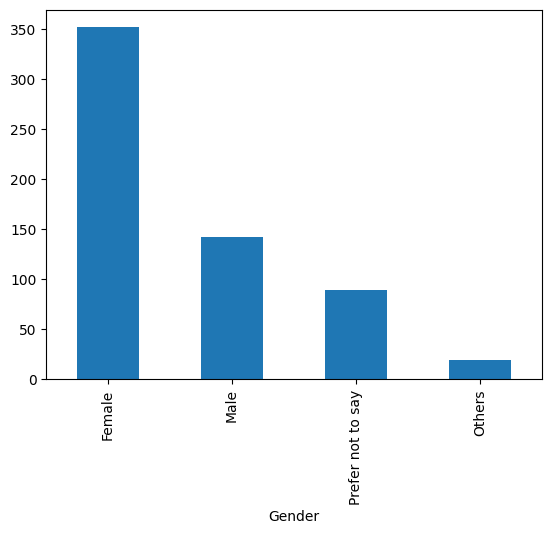


============================== Purchase_Frequency ==============================
None
Categories          Few times a month  Less than once a month  Once a week  \
Purchase_Frequency              33.72                    20.6         18.6   

Categories          Once a month  Multiple times a week  
Purchase_Frequency         17.77                    9.3  


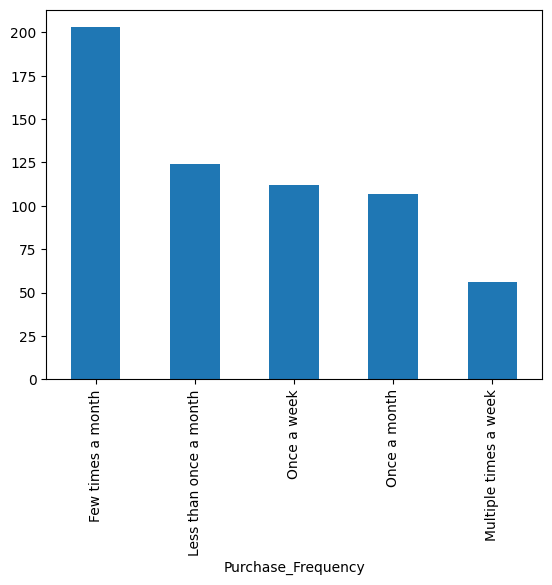


============================== Purchase_Categories ==============================
None
Categories           Beauty and Personal Care  Clothing and Fashion  others  \
Purchase_Categories                     17.61                 17.61    7.97   

Categories           Beauty and Personal Care;Clothing and Fashion  \
Purchase_Categories                                           7.64   

Categories           Beauty and Personal Care;Clothing and Fashion;Home and Kitchen  \
Purchase_Categories                                               6.98                

Categories           Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others  \
Purchase_Categories                                               5.32                                                  

Categories           Clothing and Fashion;Home and Kitchen  Home and Kitchen  \
Purchase_Categories                                   4.49              3.99   

Categories           Beauty and P

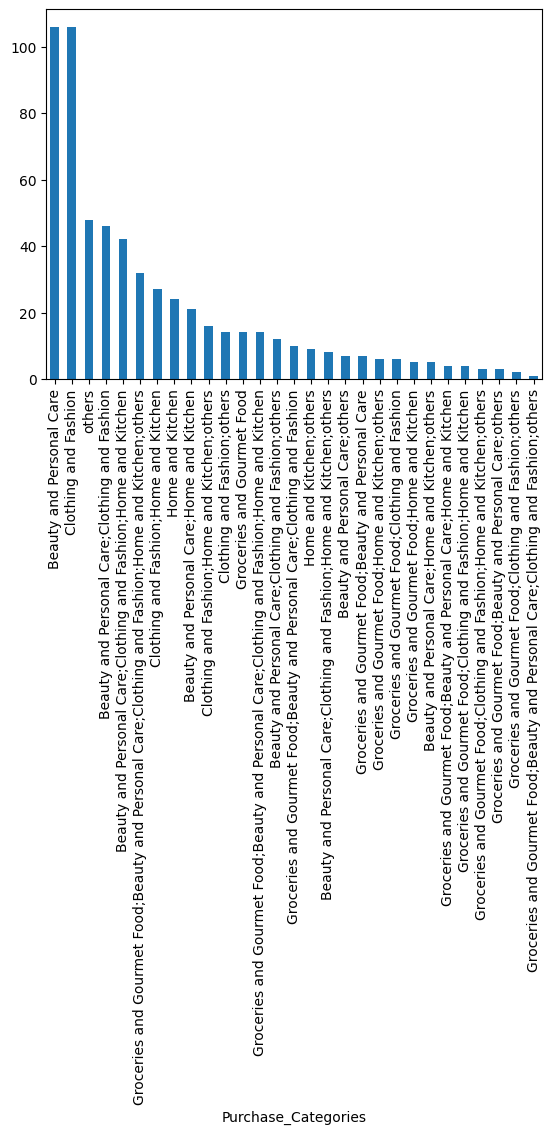


============================== Personalized_Recommendation_Frequency ==============================
None
Categories                                No  Sometimes    Yes
Personalized_Recommendation_Frequency  41.69      38.04  20.27


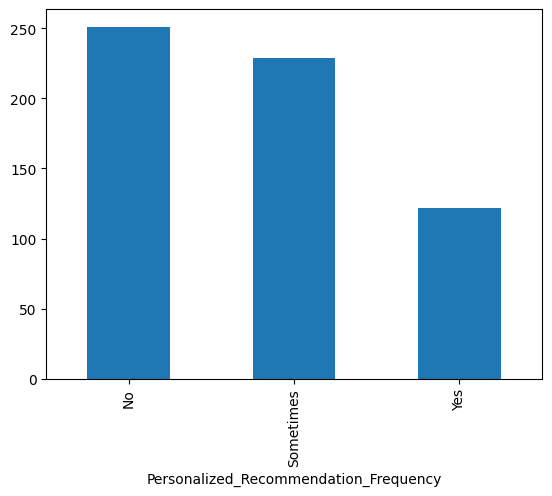


============================== Browsing_Frequency ==============================
None
Categories          Few times a week  Few times a month  Rarely  \
Browsing_Frequency             41.36              33.06   12.79   

Categories          Multiple times a day  
Browsing_Frequency                 12.79  


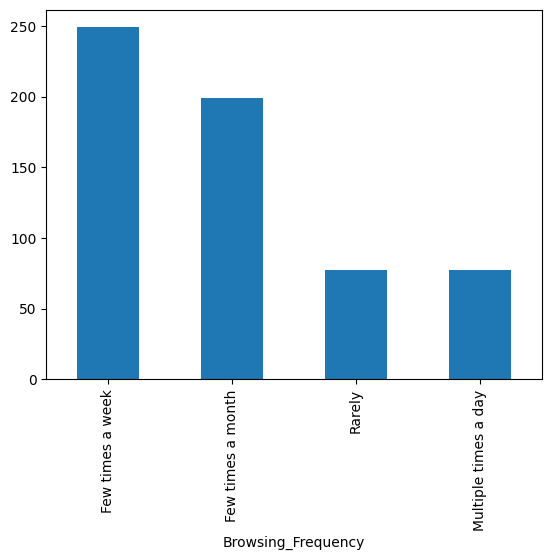


============================== Product_Search_Method ==============================
None
Categories             categories  Keyword  Filter  others
Product_Search_Method       37.04    35.55    21.1    5.98


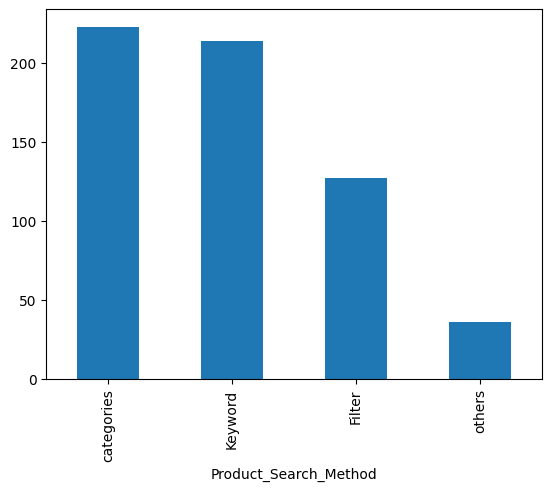


============================== Search_Result_Exploration ==============================
None
Categories                 Multiple pages  First page
Search_Result_Exploration           73.42       26.58


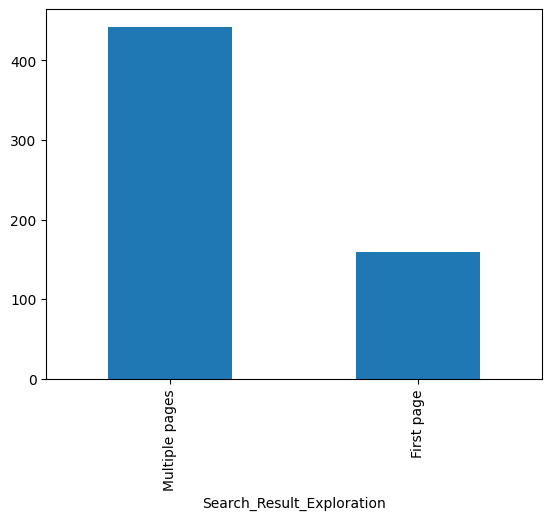


============================== Add_To_Cart_Browsing ==============================
None
Categories            Maybe    Yes     No
Add_to_Cart_Browsing   41.2  35.88  22.92


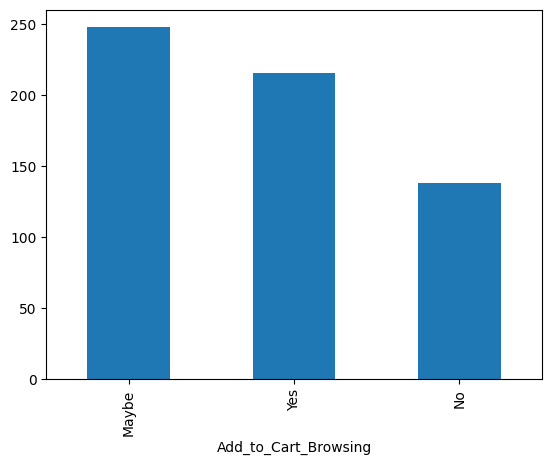


============================== Cart_Completion_Frequency ==============================
None
Categories                 Sometimes  Often  Rarely  Always  Never
Cart_Completion_Frequency       50.5  26.25   11.96    7.81   3.49


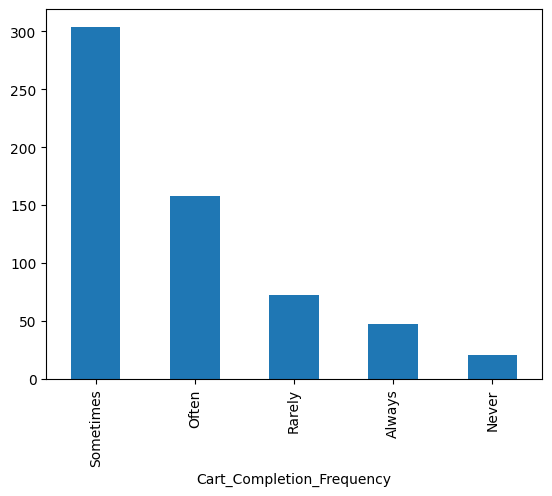


============================== Cart_Abandonment_Factors ==============================
None
Categories                Found a better price elsewhere  \
Cart_Abandonment_Factors                           42.36   

Categories                Changed my mind or no longer need the item  \
Cart_Abandonment_Factors                                       40.03   

Categories                High shipping costs  others  
Cart_Abandonment_Factors                11.63    5.98  


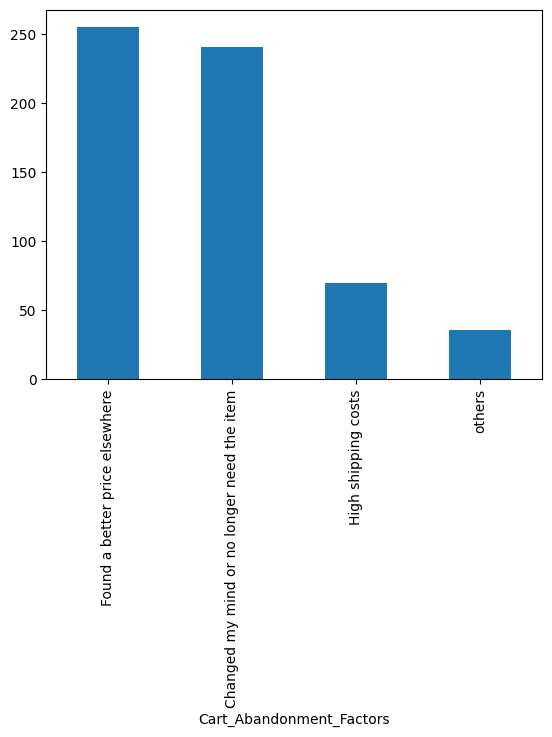


============================== Saveforlater_Frequency ==============================
None
Categories              Sometimes  Often  Rarely  Never  Always
Saveforlater_Frequency      41.69  25.91   13.62    9.8    8.97


KeyboardInterrupt: 

In [8]:
categories = ['Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness', "Recommendation_Helpfulness", "Service_Appreciation", 'Improvement_Areas']

#fig, axes = plt.subplots(len(df_ama_categoricals.columns), 2, figsize=(10, 5 * len(df_ama_categoricals.columns)))
for category in categories:

    category_counts = visual_data(df_ama_categoricals, category)
    category_df = pd.DataFrame(category_counts).T
    category_df.index = [category]  # Asignar la variable como el índice

    category_df.columns.name = 'Categories'

    # Show the data frame
    header_text = print(f"\n{'='*30} {category.title()} {'='*30}")
    print(  header_text)
    print(category_df)

    # Make a graph with that
    category_graf = graf_data(df_ama_categoricals, category)
    plt.show(category_graf)



# 2.1) b) Cleaning and redefining categories for some categorical variables

In the earlier graphs, we identified an issue with some categorical variables.
```
```
**1)** The **Purchase_Categories** variable contains two or more distinct categories in many dataset records, indicating that one of the 602 individuals (the size of the Amazon dataset) could have purchased items from more than one category.To address this, I used a boolean mask to group the categories.
```
```
**2)** The **Service_Appreciation** variable contains three categories: Customer Service, Quick Delivery, and All of the Above, each with a very low percentage (0.17% in each case). I find it more useful to create a new category (Others) to summarize these.
```
```
**3)**The **Improvement_Areas** variable, similar to **Purchase_Categories**, contains too many categories. To address this, I again used a boolean mask to group the categories.






In [ ]:
Purchase_Categories = df_ama_categoricals['Purchase_Categories'].to_list()  # First, i use tdhe pandas methot to_list


In [ ]:
New_Categories = ["Beauty and Personal Care", 'Clothing and Fashion', "Groceries and Gourmet Food", "Home and Kitchen", "others"] # Second, I created a list with the grouped categories. Be careful, because if you include the "others" category in the list, you don’t need to repeat it when creating the boolean mask.

In [ ]:
mascara = df_ama_categoricals['Purchase_Categories'].isin(New_Categories) # Third, I applied the list to create a boolean mask.
mascara.value_counts()
df_ama_categoricals['Grouped_Categories'] = df_ama_categoricals['Purchase_Categories'].where(mascara)


In [ ]:
category_counts = visual_data(df_ama_categoricals, "Grouped_Categories")
category_counts


In [ ]:
category_graf = graf_data(df_ama_categoricals, "Grouped_Categories")

In [ ]:
Service_Categories = df_ama_categoricals['Service_Appreciation'].to_list()  # First, i use tdhe pandas methot

New_Categories = ["Competitive prices", 'Wide product selection', "User-friendly website/app interface", "Product recommendations"] # Second, I created a list with the grouped categories.

In [ ]:
mascara2 = df_ama_categoricals['Service_Appreciation'].isin(New_Categories) # Third, I applied the list to create a boolean mask.

df_ama_categoricals['Grouped_Service'] = df_ama_categoricals['Service_Appreciation'].where(mascara2, "Other")

In [ ]:
category_counts = visual_data(df_ama_categoricals, "Grouped_Service")
category_counts

In [ ]:
category_graf = graf_data(df_ama_categoricals, "Grouped_Service")

In [ ]:
Improvment_Categories = df_ama_categoricals['Improvement_Areas'].to_list()  # First, i use the pandas method

New_Categories = ["Customer service responsiveness", "Product quality and accuracy", "Reducing packaging waste","Shipping speed and reliability"] # Second, I created a list with the grouped categories.

In [ ]:
mascara3 = df_ama_categoricals['Improvement_Areas'].isin(New_Categories) # Third, I applied the list to create a boolean mask.

df_ama_categoricals['Grouped_Improvement'] = df_ama_categoricals['Improvement_Areas'].where(mascara3, "Other")

In [ ]:
category_counts = visual_data(df_ama_categoricals, "Grouped_Improvement")
category_counts

In [ ]:
category_graf = graf_data(df_ama_categoricals, "Grouped_Improvement")

# 2.1) c) Numerical variables analysis

In [ ]:
df_ama_numericals = df_ama.select_dtypes(include=['int64'])
df_ama_numericals.info()


In [ ]:
df_ama_numericals.describe() # A quick glance at the data reveals that the numerical
#variables represent the ratings given by Amazon customers to the site.

In [ ]:
df_ama_numericals.hist(figsize=(8, 8), edgecolor='black')
plt.show()

In [ ]:
corr_matrix = df_ama_numericals.corr()
corr_matrix


In [ ]:
plt.figure(figsize=(6, 4))  
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

As you can see in the Pearson Correlation Matrix, we found two variables that may have a linear correlation with **Shopping_Satisfaction**. These variables are **Rating_Accuracy** and  **Personalized_Recommendation_Frequency**

# 2.2) Bivariate Analysis

In this section, I will use contingency tables to answer the questions I raised in Section One.

**1)** **What gender have the greatest overall satisfaction with Amazon web servicies?**

In [ ]:
contingency_table = pd.crosstab(df_ama_numericals['Shopping_Satisfaction'], df_ama_categoricals['Gender'], margins= True, normalize = "columns" ) * 100
contingency_table = contingency_table.round(2)
contingency_table


In [ ]:
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi-squared: {chi2}, p-valor: {p}')

As we can see from the contingency tables, people, regardless of gender, show overall satisfaction with Amazon services (86% of them).
On the other hand, the Chi-Squared test suggests that gender and shopping satisfaction have a statistically significant relationship.

**2)** **What is the purchase frequency of the dissatisfied Amazon shoppers?**

In [ ]:
contingency_table = pd.crosstab(df_ama_numericals['Shopping_Satisfaction'], df_ama_categoricals['Purchase_Frequency'], margins= True, normalize = "columns" ) * 100
contingency_table = contingency_table.round(2)
contingency_table

In [ ]:
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi-Squared: {chi2}, p-valor: {p}')

The data shows that people with a **Multiple times a week** purchase frequency exhibit a high level of dissatisfaction (5.36%), which is a alert for the marketing area.
However, the Chi-squared test concludes that there is no statistically significant relationship. This is not a reason to ignore the information in the table, as correlation does not imply causality.


**3)** **What are the categories that show the highest leves of dissatisfaction?**

In [ ]:
contingency_table = pd.crosstab(df_ama_numericals['Shopping_Satisfaction'], df_ama_categoricals['Grouped_Categories'], margins= True, normalize = "columns" ) * 100
contingency_table = contingency_table.round(2)
contingency_table


In [ ]:
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi-Squared: {chi2}, p-valor: {p}')

We can show that **Clothing and Beauty and Personal Care** exhibit the highest level of dissatisfaction (4.72%). This could be a reason for a deeper analysis of the category. Note that, once again, the Chi-squared test shows no statistically significant relationship.

**4) What does the data tell us about the potential "complaining buyers"?**

In [ ]:
contingency_table = pd.crosstab(df_ama_numericals['Shopping_Satisfaction'], df_ama_numericals['Rating_Accuracy '], margins= True, normalize = "columns" ) * 100
contingency_table = contingency_table.round(2)
contingency_table


In [ ]:
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi-Squared: {chi2}, p-valor: {p}')

The table above show some interesting information. We can see that people with the highest levels of dissatisfaction consider the relevance or accuracy of the recommendations they received to be irrelevant (42.86%). These people may tend to be 'very complaining buyers,' and the company might prefer to focus less on them.
Again, there´s no statistically significant relationship.

**5) What is the browsing frequency of dissatisfied Amazon shoppers?**

In [ ]:
contingency_table = pd.crosstab(df_ama_numericals['Shopping_Satisfaction'], df_ama_categoricals['Browsing_Frequency'], margins= True, normalize = "columns" ) * 100
contingency_table = contingency_table.round(2)
contingency_table

In [ ]:
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi-Squared: {chi2}, p-valor: {p}')

As you can see, 2.60% of the people who bought multiple times a day exhibit a high level of dissatisfaction. Again, that's a 'red flag' for the marketing area and it’s important to focus on them. Finaly, there´s no statistically significant relationship.

# 3) Concluding Remarks
Regardless of the contingency tables summarizing the 5 questions/hypotheses I presented in Section 1, which show no statistical significance, correlation does not imply causation. For this reason, I believe the dataset could still provide valuable insights for marketing research.